### Hypothesis :Does the college you graduated from affects your starting salary and does this affect continue even too your mid career ?(From -Stuti Singh)

In [2]:
#importing relevant libraries
import pandas as pd
import researchpy as rp
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

sns.set()

In [3]:
#reading CSV file and creating a dataframe using Pandas
sal_by_college=pd.read_csv('salaries-by-college-type.csv')
sal_by_college.columns=['school_name', 'school_type', 'startmed_Sal',
       'midcareer_med_sal', 'midcareer_10thpersal',
       'midcareer_25thpercsal',
       'midcareer_75thpercsal',
       'midcareer_90thpersal']

In [4]:
#checking NAN in our dataset
sal_by_college.isnull().any()

school_name              False
school_type              False
startmed_Sal             False
midcareer_med_sal        False
midcareer_10thpersal      True
midcareer_25thpercsal    False
midcareer_75thpercsal    False
midcareer_90thpersal      True
dtype: bool

In [6]:
print('Percentage of Null midcareer_10thpersal:', len(sal_by_college[sal_by_college.midcareer_10thpersal.isna()])/ len(sal_by_college))
print('Number of midcareer_10thpersal:', sal_by_college.midcareer_10thpersal.nunique())

Percentage of Null midcareer_10thpersal: 0.1412639405204461
Number of midcareer_10thpersal: 141


In [7]:
print('Percentage of Null midcareer_75thpersal:', len(sal_by_college[sal_by_college.midcareer_90thpersal.isna()])/ len(sal_by_college))
print('Number of midcareer_75thpersal:', sal_by_college.midcareer_90thpersal.nunique())

Percentage of Null midcareer_75thpersal: 0.1412639405204461
Number of midcareer_75thpersal: 98


In [8]:
sal_by_college.describe()

,school_name,school_type,startmed_Sal,midcareer_med_sal,midcareer_10thpersal,midcareer_25thpercsal,midcareer_75thpercsal,midcareer_90thpersal
count,269,269,269,269,231,269,269,231
unique,249,5,145,168,141,178,110,98
top,University of Illinois at Urbana-Champaign (UIUC),State,"$42,600.00","$72,100.00","$40,100.00","$54,100.00","$106,000.00","$150,000.00"
freq,2,175,7,5,6,6,11,8


In [9]:
#creating new dataframe from original one
df=sal_by_college.copy()

In [10]:
#dropping all null values
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)
df.head()

,school_name,school_type,startmed_Sal,midcareer_med_sal,midcareer_10thpersal,midcareer_25thpercsal,midcareer_75thpercsal,midcareer_90thpersal
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"
1,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00"
2,Worcester Polytechnic Institute (WPI),Engineering,"$61,000.00","$114,000.00","$80,000.00","$91,200.00","$137,000.00","$180,000.00"
3,Carnegie Mellon University (CMU),Engineering,"$61,800.00","$111,000.00","$63,300.00","$80,100.00","$150,000.00","$209,000.00"
4,Rensselaer Polytechnic Institute (RPI),Engineering,"$61,100.00","$110,000.00","$71,600.00","$85,500.00","$140,000.00","$182,000.00"


In [11]:
#converting $ dollar sign(converting string to numerical)
for column in range(2,8):
    df.iloc[:, column] = [float(re.sub('[$,.]', '', i)[:-2]) for i in df.iloc[:, column]]

In [12]:
df.describe()

,startmed_Sal,midcareer_med_sal,midcareer_10thpersal,midcareer_25thpercsal,midcareer_75thpercsal,midcareer_90thpersal
count,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000
mean,45825.108225,82666.233766,44250.649351,59796.536797,113324.675325,157705.627706
std,6120.434189,14016.294341,8719.612427,10925.788645,21586.264690,34823.348157
min,34800.000000,43900.000000,22600.000000,31800.000000,60900.000000,87600.000000
25%,41950.000000,73050.000000,39000.000000,53000.000000,99550.000000,136000.000000
50%,44700.000000,81300.000000,43100.000000,57800.000000,111000.000000,153000.000000
75%,47650.000000,87850.000000,47400.000000,63100.000000,120500.000000,170500.000000
max,72200.000000,134000.000000,80000.000000,100000.000000,234000.000000,326000.000000


In [ ]:
#Check for extraneous values
# for col in df.columns:
#     print(col, '\n', df[col].value_counts(normalize=True).head(), '\n\n')

Text(0.5, 0.98, '')

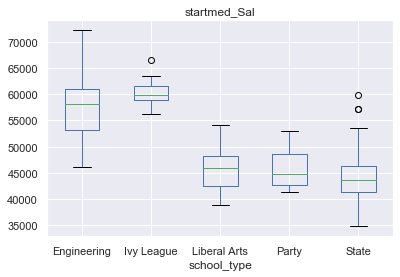

In [13]:
df.boxplot(column='startmed_Sal',by='school_type')
plt.suptitle('')

In [14]:
#adding a new column variable as sal_increase
df['salary_increase'] = df['midcareer_med_sal'] - df['startmed_Sal']

### Checking ANOVA Assumptions
##### normality


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a17e62e90>,
      dtype=object)

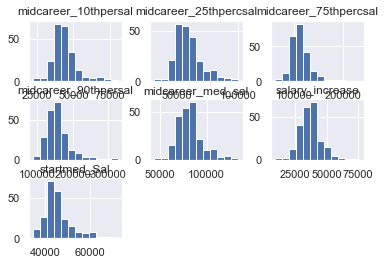

In [15]:
df.hist(bins=12)

#### qq plots

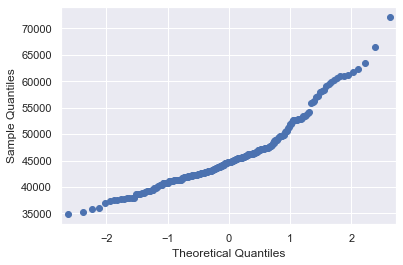

In [16]:
import statsmodels.api as sm
fig = sm.qqplot(df['startmed_Sal'])

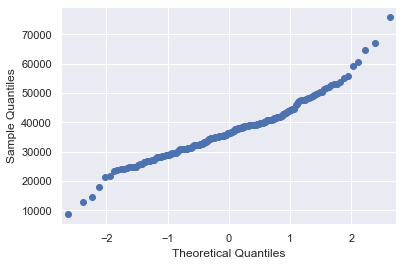

In [17]:
fig1 = sm.qqplot(df['salary_increase'])

Text(0.5, 0.98, '')

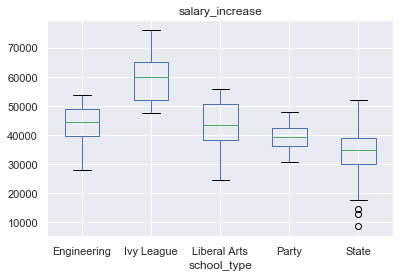

In [18]:
df.boxplot(column='salary_increase',by='school_type')
plt.suptitle('')

#### ANOVA with scipy.stats

In [19]:
#Analysis of Variance (ANOVA)ONE WAY (for starting salary to college type)
stats.f_oneway(df['startmed_Sal'][df['school_type'] == 'Ivy League'], 
             df['startmed_Sal'][df['school_type'] == 'State'],
             df['startmed_Sal'][df['school_type'] == 'Liberal Arts'],
              df['startmed_Sal'][df['school_type'] == 'Engineering'],
              df['startmed_Sal'][df['school_type'] == 'Party'])

F_onewayResult(statistic=54.933900601403494, pvalue=2.6432887155841926e-32)

### The F-statistic= 54.933900601403494 and the p-value= 2.6432887155841926e-32 which is indicating that there is an overall significant effect of type of school on starting salary.

In [1]:
#Your code here
import statsmodels.api as sm
from statsmodels.formula.api import ols


results = ols('startmed_Sal ~ C(school_type)', data=df).fit()
results.summary()

NameError: name 'df' is not defined

In [23]:
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(school_type),4.247324e+09,4.0,54.933901,2.643289e-32
Residual,4.368410e+09,226.0,NaN,NaN


In [24]:
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    
    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(school_type),4.247324e+09,4.0,1.061831e+09,54.933901,2.643289e-32,0.492973,0.482916
Residual,4.368410e+09,226.0,1.932925e+07,NaN,NaN,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
Engineering,Ivy League,3035.0,0.5117,-2258.1066,8328.1066,False
Engineering,Liberal Arts,-11268.5714,0.001,-15761.4708,-6775.672,True
Engineering,Party,-11561.0526,0.001,-15736.9938,-7385.1115,True
Engineering,State,-13313.7143,0.001,-16566.4553,-10060.9732,True
Ivy League,Liberal Arts,-14303.5714,0.001,-19662.0275,-8945.1154,True
Ivy League,Party,-14596.0526,0.001,-19691.6773,-9500.428,True
Ivy League,State,-16348.7143,0.001,-20719.8961,-11977.5325,True
Liberal Arts,Party,-292.4812,0.9,-4550.9502,3965.9878,False
Liberal Arts,State,-2045.1429,0.4531,-5403.1777,1312.892,False
Party,State,-1752.6617,0.468,-4673.0619,1167.7386,False


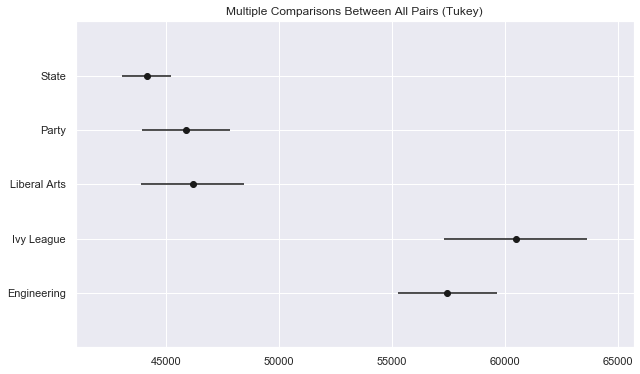

In [25]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df['startmed_Sal'],     # Data
                          groups=df['school_type'],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

tukey.summary() 

In [26]:
#Analysis of Variance (ANOVA)(for "increase in salary and schooltype")
stats.f_oneway(df['salary_increase'][df['school_type'] == 'Ivy League'], 
             df['salary_increase'][df['school_type'] == 'State'],
             df['salary_increase'][df['school_type'] == 'Liberal Arts'],
              df['salary_increase'][df['school_type'] == 'Engineering'],
              df['salary_increase'][df['school_type'] == 'Party'])

F_onewayResult(statistic=33.19169161242803, pvalue=8.955569733314834e-22)

group1,group2,meandiff,p-adj,lower,upper,reject
Engineering,Ivy League,15716.6667,0.001,7217.7362,24215.5972,True
Engineering,Liberal Arts,-469.0476,0.9,-7683.1173,6745.0221,False
Engineering,Party,-5070.1754,0.2327,-11775.3179,1634.967,False
Engineering,State,-9492.1905,0.001,-14714.9873,-4269.3937,True
Ivy League,Liberal Arts,-16185.7143,0.001,-24789.5738,-7581.8547,True
Ivy League,Party,-20786.8421,0.001,-28968.6838,-12605.0004,True
Ivy League,State,-25208.8571,0.001,-32227.4897,-18190.2245,True
Liberal Arts,Party,-4601.1278,0.3477,-11438.782,2236.5264,False
Liberal Arts,State,-9023.1429,0.001,-14415.0058,-3631.2799,True
Party,State,-4422.015,0.0752,-9111.1855,267.1554,False


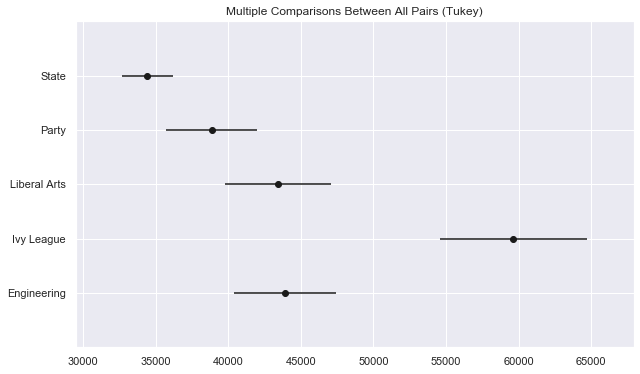

In [27]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df['salary_increase'],     # Data
                          groups=df['school_type'],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

tukey.summary()  

### After LOG transformation of start median salary

In [28]:
df['log_startSal']=np.log(df['startmed_Sal'])
df['log_salincrease']=np.log(df['salary_increase'])


In [34]:
df.drop(columns=['midcareer_10thpersal','midcareer_25thpercsal','midcareer_75thpercsal','midcareer_90thpersal'],inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1b1d2e50>,
      dtype=object)

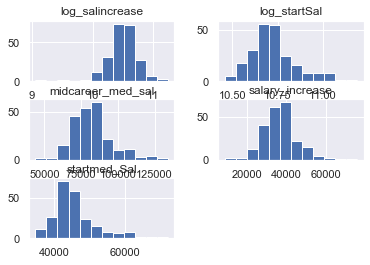

In [35]:
df.hist(bins=12)

In [29]:
#Analysis of Variance (ANOVA)ONE WAY(for startmedian salary to school type)
stats.f_oneway(df['log_startSal'][df['school_type'] == 'Ivy League'], 
             df['log_startSal'][df['school_type'] == 'State'],
             df['log_startSal'][df['school_type'] == 'Liberal Arts'],
              df['log_startSal'][df['school_type'] == 'Engineering'],
              df['log_startSal'][df['school_type'] == 'Party'])

F_onewayResult(statistic=45.79072461042765, pvalue=3.823835521299689e-28)

#### Post-hoc Testing(TUKEY’S HSD POST-HOC COMPARISON) for starting salary to school type

group1,group2,meandiff,p-adj,lower,upper,reject
Engineering,Ivy League,0.0559,0.6394,-0.0579,0.1697,False
Engineering,Liberal Arts,-0.218,0.001,-0.3146,-0.1214,True
Engineering,Party,-0.2222,0.001,-0.3119,-0.1324,True
Engineering,State,-0.2626,0.001,-0.3325,-0.1927,True
Ivy League,Liberal Arts,-0.2739,0.001,-0.3891,-0.1587,True
Ivy League,Party,-0.2781,0.001,-0.3876,-0.1685,True
Ivy League,State,-0.3185,0.001,-0.4125,-0.2245,True
Liberal Arts,Party,-0.0041,0.9,-0.0957,0.0874,False
Liberal Arts,State,-0.0446,0.4388,-0.1168,0.0276,False
Party,State,-0.0404,0.3942,-0.1032,0.0223,False


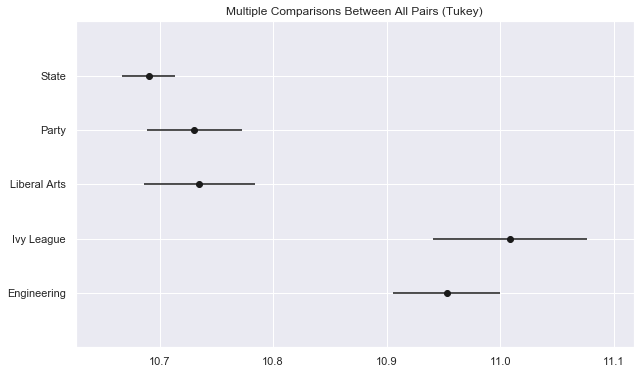

In [37]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df['log_startSal'],     # Data
                          groups=df['school_type'],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

tukey.summary()  

#### Post-hoc Testing(TUKEY’S HSD POST-HOC COMPARISON) for increase in salary to school type

In [39]:
#Analysis of Variance (ANOVA)ONE WAY(for increase in salary to school type)
stats.f_oneway(df['log_salincrease'][df['school_type'] == 'Ivy League'], 
             df['log_salincrease'][df['school_type'] == 'State'],
             df['log_salincrease'][df['school_type'] == 'Liberal Arts'],
              df['log_salincrease'][df['school_type'] == 'Engineering'],
              df['log_salincrease'][df['school_type'] == 'Party'])

F_onewayResult(statistic=19.025063141884385, pvalue=1.6845708160879386e-13)

#### Post-hoc Testing(TUKEY’S HSD POST-HOC COMPARISON) for increase in salary to school type

group1,group2,meandiff,p-adj,lower,upper,reject
Engineering,Ivy League,0.3099,0.0137,0.0433,0.5766,True
Engineering,Liberal Arts,-0.0186,0.9,-0.2449,0.2078,False
Engineering,Party,-0.1149,0.5538,-0.3253,0.0955,False
Engineering,State,-0.2521,0.001,-0.416,-0.0882,True
Ivy League,Liberal Arts,-0.3285,0.0084,-0.5985,-0.0585,True
Ivy League,Party,-0.4249,0.001,-0.6816,-0.1681,True
Ivy League,State,-0.562,0.001,-0.7823,-0.3418,True
Liberal Arts,Party,-0.0964,0.7047,-0.3109,0.1182,False
Liberal Arts,State,-0.2335,0.0018,-0.4027,-0.0643,True
Party,State,-0.1371,0.081,-0.2843,0.01,False


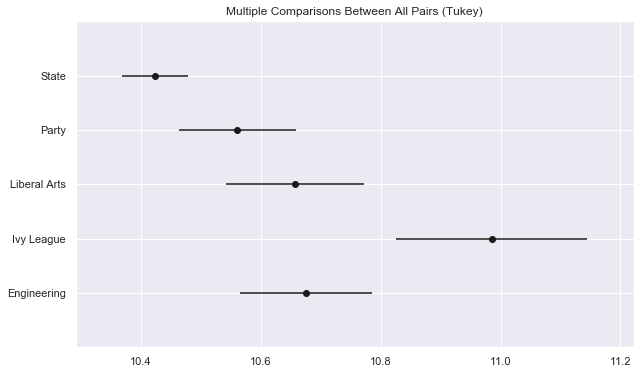

In [40]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df['log_salincrease'],     # Data
                          groups=df['school_type'],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

tukey.summary()  

### Conclusion
                 


##### 1.   First Part of hypothesis is true. 
1. School type you have graduated from has a significant impact on your starting median salary.
2. Starting Median Salary is not statistically different for IVY league and enginnering school type.
###### 2. Second part of hypothesis is also validated .Salary increase in mid career is also significantly affected by school type.
1. Student from Ivy league college expereince high salary increase in mid career.